Data Wrangling

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Iot data set measuring temperture both inside and outside a room
data = pd.read_csv('/Users/elenadubocanin/Downloads/IOT-temp.csv')

# Checking for null values
data.info()

# Exploring properties of data set (shape, number of unique values)
print(data.shape)
uni = data[['id','room_id/id','noted_date','temp','out/in']].nunique()
print(uni)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB
(97606, 5)
id            97605
room_id/id        1
noted_date    27920
temp             31
out/in            2
dtype: int64


In [53]:
data['Date'] = pd.to_datetime(data['noted_date']).dt.date
data['Time'] = pd.to_datetime(data['noted_date']).dt.time
data.drop('noted_date', axis =1)

,id,room_id/id,temp,out/in,Date,Time
0,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018-08-12,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018-08-12,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018-08-12,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018-08-12,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018-08-12,09:29:00
...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018-07-28,07:07:00
97602,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018-07-28,07:07:00
97603,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018-07-28,07:06:00
97604,__export__.temp_log_123297_4d8e690b,Room Admin,31,In,2018-07-28,07:06:00


Exploratory Data Analysis

In [54]:
# Summary Stats for each column
data.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [57]:
data['inside'] = [1 if x =='In' else 0 for x in data['out/in']]

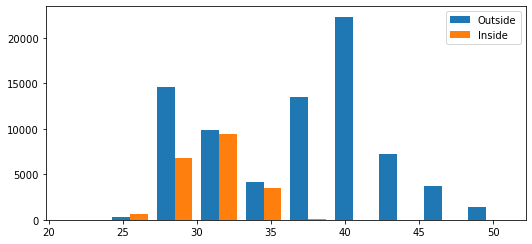

Total Inside Obs : 20345
Total Outside Obs : 77261


In [56]:
# Creating comparitive plot of temperature inside and temperature outside
x = data[data['inside']==0]['temp']
y = data[data['inside']==1]['temp']

plt.hist([x, y], label=['Outside', 'Inside'])
plt.legend(loc='upper right')
plt.show()

print('Total Inside Obs :',len([i for i in data['inside'] if  i == 1]))
print('Total Outside Obs :',len([i for i in data['inside'] if  i == 0]))

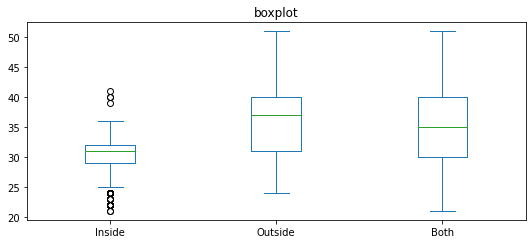

Inside Median :  31.0
Inside Max :  41
Inside Min :  21
Outside Median :  37.0
Outside Max :  51
Outside Min :  24
Overall Median :  35.0
Total Max :  51
Total Min :  21


In [24]:
# Boxplot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
boxy = pd.DataFrame({"Inside": y, "Outside": x, 
                     "Both": data['temp']})
ax = boxy[['Inside', 'Outside', 'Both']].plot(kind='box', title='boxplot')
plt.show()

# Since there are outliers, median is a better measurement of average
overall_median = np.median(data['temp'])
inside_median = np.median(data[data['inside']==1]['temp'])
outside_median = np.median(data[data['inside']==0]['temp'])

# Looking at max and min temperatures along with median
print("Inside Median : ", inside_median)
print("Inside Max : ", np.max(data[data['inside']==1]['temp']))
print("Inside Min : ", np.min(data[data['inside']==1]['temp']))
print("Outside Median : ", outside_median)
print("Outside Max : ", np.max(data[data['inside']==0]['temp']))
print("Outside Min : ", np.min(data[data['inside']==0]['temp']))
print("Overall Median : ", overall_median)
print("Total Max : ", np.max(data['temp']))
print("Total Min : ", np.min(data['temp']))

/Users/elenadubocanin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='temp'>

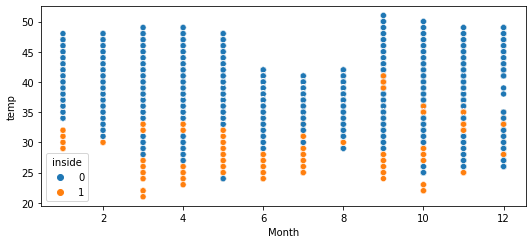

In [58]:
# Looking in depth by smaller increments of time
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

sns.scatterplot(data['Month'],data['temp'],hue=data['inside'])

September Average Temperature: 34.865119408005384


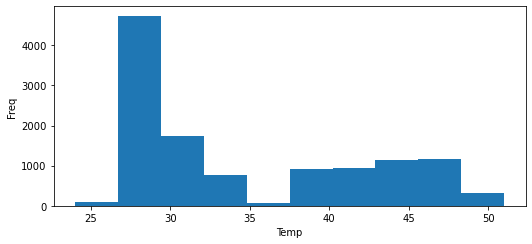

In [27]:
# Examining Month 9 since it has the highest temperatures and a wide range of temperatures
sept = data[data['Month']==9]['temp']
plt.hist(sept)
plt.xlabel('Temp')
plt.ylabel('Freq')

sept_avg = np.mean(sept)
print("September Average Temperature:",sept_avg)

Random Forest Classifier for Inside or Outside Measurment of Temperature

In [59]:
data

,id,room_id/id,noted_date,temp,out/in,Date,Time,inside,Year,Month,Day
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-08-12,09:30:00,1,2018,8,12
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-08-12,09:30:00,1,2018,8,12
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-08-12,09:29:00,0,2018,8,12
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-08-12,09:29:00,0,2018,8,12
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-08-12,09:29:00,1,2018,8,12
...,...,...,...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In,2018-07-28,07:07:00,1,2018,7,28
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In,2018-07-28,07:07:00,1,2018,7,28
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In,2018-07-28,07:06:00,1,2018,7,28
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In,2018-07-28,07:06:00,1,2018,7,28


In [84]:
# Using classifier for measuring temperature on whether it is inside of outside
X = data[['temp','Month','Day']]
y = data['inside']

# Creating traing and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300, max_depth=12,
                                 bootstrap=True, n_jobs=3,
                                 random_state=0, oob_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9136358979612744


The original parameters of the model which was 200 trees, a max depth of 3, and 1 job only gave the model an accuracy score of 82.7%. Although the increase of trees and jobs helped improve the model, increasing max depth from 3 to 12 improved the accuracy score by almost 10 percent. The test/train split also increased from 0.25 to 0.1 in order to help increase model accuracy. Since there is a large amount of overlap between indoor and outdoor measurments of temperature, the accuracy score suggests that this classifier is a good fit for this data. 

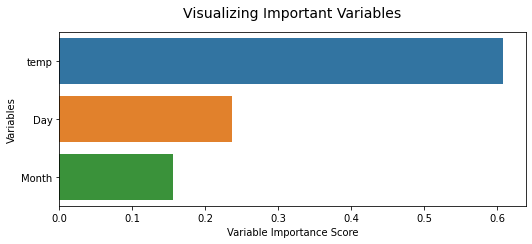

In [87]:
# Importance based on each variable
var_imp = pd.Series(rf.feature_importances_, 
                        index=['temp','Month','Day']).sort_values(ascending=False)

sns.barplot(x=var_imp, y=var_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Visualizing Important Variables", pad=15, size=14)
plt.savefig('barplot.png')